파생변수
- 기존의 변수를 변형(조합 또는 함수를 이용해 새로운 변수)해 만든 변수

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(
    {
        'var1':[4,3,8],
        'var2':[2,6,1]
    }
)
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [4]:
df['var_sum'] = df['var1'] + df['var2']
# var1과 var2를 더한 var_sum이라는 파생변수 만들기
# 새로 만든 변수는 데이터 프레임 오른쪽 끝에 나열됨
df

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [5]:
df['var_mean'] = (df['var1'] + df['var2'])/2
df

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


mpg 통합 연비 변수 만들기

cty: 도시 연비
hwy: 고속도로 연비

만들고자하는 새로운 파생변수
- 통합 연비 = (cty + hwy)/2

In [6]:
mpg = pd.read_csv('../data/mpg.csv')
mpg_copy = mpg.copy()
mpg_copy

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [7]:
mpg_copy['total'] = (mpg_copy['cty']+mpg_copy['hwy'])/2
mpg_copy

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [9]:
sum(mpg_copy['total'])/len(mpg)
# 통합 연비 변수의 평균

20.14957264957265

In [10]:
mpg_copy['total'].mean()
# df.mean() 메소드를 이용한 통합 연비 변수 평균

20.14957264957265

조건문을 활용해 파생변수 만들기

조건에 따라 서로 다른 값을 반환하는 조건문 함수로 파생변수 만들기

- 연비가 기준값을 넘기면 합격, 넘지 못하면 불합격을 부여하는 변수

1. 기준값 정하기

In [12]:
mpg_copy['total'].describe()
# 합격여부 기준값 정하기

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

<Axes: ylabel='Frequency'>

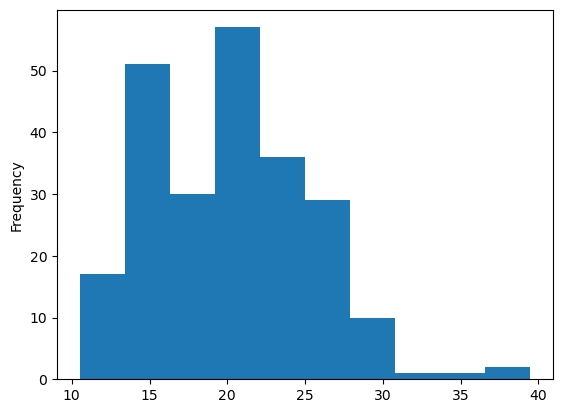

In [14]:
mpg_copy['total'].plot.hist()
# df.plot.hist()를 이용하여 히스토그램 그래프 만들기

- total의 평균과 중앙값이 약 20이다

- total의 연비가 20~22.5사이인 자동차 모델이 가장 많다

- total의 연비는 대부분 25이하이고, 25를 넘기는 자동차 모델은 많지 않다

이들을 종합하여 기준값을 20으로 설정

20을 넘으면 합격, 넘지 못하면 불합격으로 분류하는 변수 만들기

2. 합격 판정 변수 만들기

- numpy.where() 을 이용하면 조건에 따라 서로 다른 값을 부여할 수 있다.

    df.['파생변수명'] = numpy.where(df.['조건변수']수식, true일때 값, false일때 값)

In [15]:
import numpy as np

In [17]:
mpg_copy['test'] = np.where(mpg_copy['total']>=20, 'pass', 'fail')
mpg_copy.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass


3. 빈도표로 합격 판정 자동차 수 보기

- df.value_counts() 

In [19]:
mpg_copy['test'].value_counts()

test
pass    128
fail    106
Name: count, dtype: int64

4. 막대그래프로 빈도 표현하기

- 막대그래프: df.plot.bar()

- 히스토그래프: df.plot.hist()

<Axes: xlabel='test'>

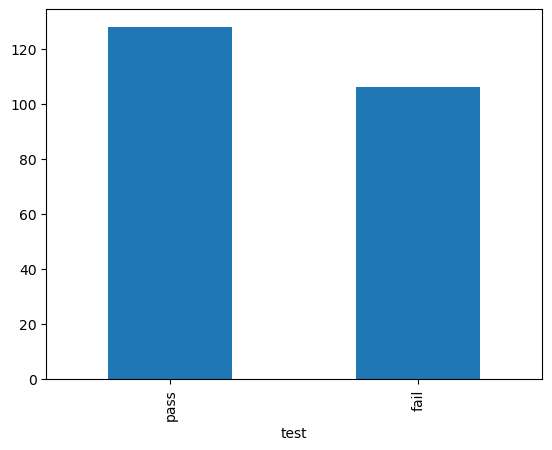

In [20]:
count_test = mpg_copy['test'].value_counts()
count_test.plot.bar()

<Axes: xlabel='test'>

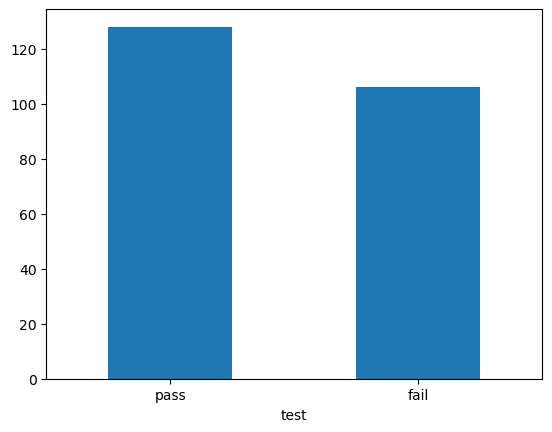

In [23]:
count_test.plot.bar(rot = 0)
# df.plot.bar의 기본값은 축 이름을 90도로 회전하게 되어있음
# rot = 0으로 축 이름 수평으로 만들기

중첩 조건문 활용하기

- 연비 등급 분류 변수 만들기: 기준값=total

- 범주 값을 3가지 이상 부여하려면 np.where안에 다시 np.where 넣고 ...

In [27]:
df = pd.DataFrame({
    '등급': ['A','B','C'],
    '기준': ['30이상', '20~29', '20미만']
})
# 연비 등급표 (내가 보기 편할라구)
df

,등급,기준
0,A,30이상
1,B,20~29
2,C,20미만


1. 연비 등급 변수 grade 만들기 

In [29]:
mpg_copy['grade'] = np.where(mpg_copy['total']>=30, 'A',
                    np.where(mpg_copy['total']>=20, 'B', 'C'))
mpg_copy.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B


2. 빈도표와 막대 그래프로 연비 등급 살펴보기

In [38]:
count_grade = mpg_copy['grade'].value_counts()
count_grade
# 현재는 값을 기준으로 내림차순으로 정렬됨

grade
B    118
C    106
A     10
Name: count, dtype: int64

<Axes: xlabel='grade'>

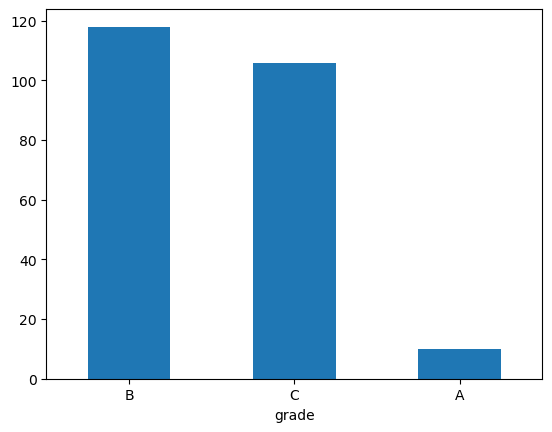

In [35]:
count_grade.plot.bar(rot=0)
# 등급빈도 막대그래프

알파벳 순서대로 막대 정렬하기

- 알파벳순 정렬: .sort_index()

In [39]:
count_grade = mpg_copy['grade'].value_counts().sort_index()
count_grade
# 변수의 알파벳순으로 정렬됨

grade
A     10
B    118
C    106
Name: count, dtype: int64

<Axes: xlabel='grade'>

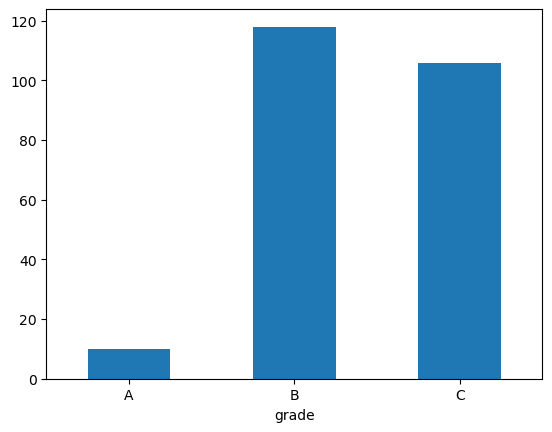

In [43]:
count_grade.plot.bar(rot=0)
# 알파벳순으로 정렬한 데이터 그리기

필요한 만큼 범주 만들기

- (필요한 범주의수-1) 만큼 np.where을 중첩하면 된다.

- total을 기준으로 30이상, 25이상, 20이상, 나머지 = A, B, C, D 인 새로운 파생변수를 만들어보자

In [56]:
mpg_copy['grade2'] = np.where(mpg_copy['total']>=30, 'A',
                     np.where(mpg_copy['total']>=25, 'B',
                     np.where(mpg_copy['total']>=20, 'C', 'D')))

count_grade2 = mpg_copy['grade2'].value_counts().sort_index() # 그래프에서 정렬하는게 아닌 데이터 자체를 정렬해놔야 함
count_grade2

grade2
A     10
B     33
C     85
D    106
Name: count, dtype: int64

<Axes: xlabel='grade2'>

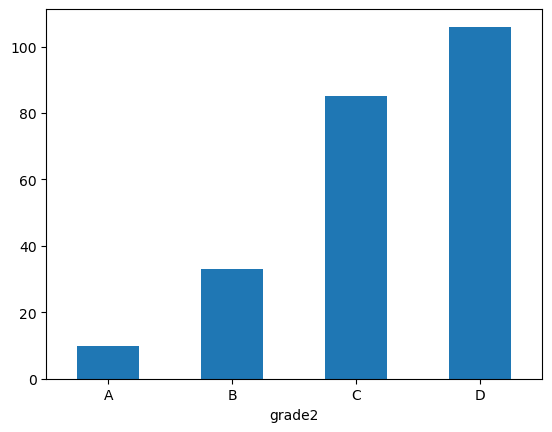

In [60]:
count_grade2.plot.bar(rot=0)

목록에 해당하는 행으로 변수 만들기

여러 조건 중 하나에 해당하면 특정 값 부여

- mpg 데이터의 categoty가 compact, subcompact, 2seater이면 새로운 변수 size에 small, 아니면 large부여

- 이어지는 조건에 또는(or)을 의미하는 |(버티컬 바)를 입력한다.

- 각 조건은 괄호로 감싸고 이어진다
    
    ex: np.where( (~) | 
                  
                (~) |
                  
                (~), 1, 2)

In [61]:
mpg_copy

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade,grade2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,C
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,pass,B,C
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,pass,B,B
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,pass,B,C
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,pass,B,C


In [66]:
mpg_copy['size'] = np.where((mpg_copy['category']=='compact')|
                            (mpg_copy['category']=='subcompact')|
                            (mpg_copy['category']=='2seater'),
                            'small', 'large')
count_size = mpg_copy['size'].value_counts().sort_index
count_size



<bound method Series.sort_index of size
large    147
small     87
Name: count, dtype: int64>

<Axes: xlabel='size'>

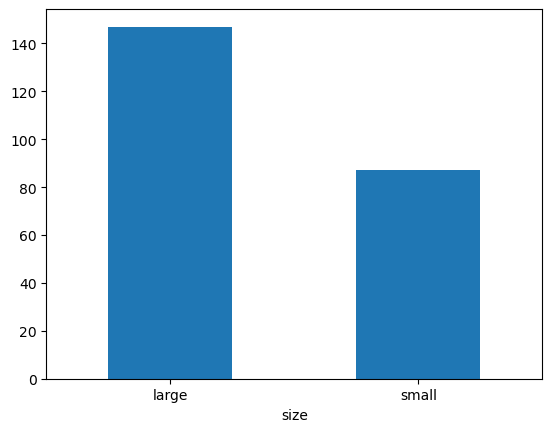

In [65]:
count_size.plot.bar(rot=0)

정리하기

In [68]:
# 1. 패키지 로드

import pandas as pd
import numpy as np

# 2. 데이터 불러오기

mpg_note = pd.read_csv('../data/mpg.csv').copy()
mpg_note

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [69]:
# 3. 데이터 파악하기

mpg_note.head()
mpg_note.tail()
mpg_note.shape
mpg_note.describe()
mpg_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [71]:
# 4. 변수명 바꾸기
mpg_note = mpg_note.rename(columns={'cty':'city'})
mpg_note

,manufacturer,model,displ,year,cyl,trans,drv,city,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [74]:
# 5. 파생변수 만들기
mpg_note['total'] = (mpg_note['city'])/2
mpg_note['test'] = np.where(mpg_note['total']>10, 'p', 'f')

mpg_note

,manufacturer,model,displ,year,cyl,trans,drv,city,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,9.0,f
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,10.5,p
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,10.0,f
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,10.5,p
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,8.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9.5,f
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,10.5,p
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,8.0,f
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,9.0,f


In [77]:
# 빈도 확인하기
count_test1 = mpg_note['test'].value_counts().sort_index()
count_test1

test
f    189
p     45
Name: count, dtype: int64

<Axes: xlabel='test'>

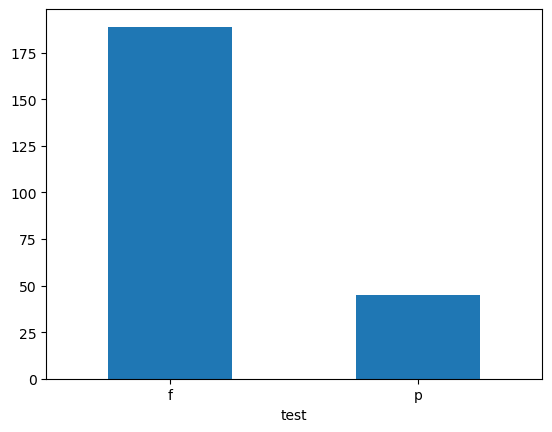

In [78]:
# 빈도 막대 그래프 그리기
count_test1.plot.bar(rot=0)